In [1]:
import pandas as pd
# Importamos o pandas para fazer a manipulação dos dados, agora vamos ler o arquivo do IBGE e imprimir para entender como ele está estruturado
df = pd.read_excel('https://sidra.ibge.gov.br/geratabela?name=Tabela%202.16%20-%20Parana.xlsx&format=xlsx&medidas=true&query=t/3939/g/32/v/all/p/2023/c79/all/l/p%2Bv,c79,t', header = 4)
print(df)

                                       Unnamed: 0     Bovino Bubalino  \
0                                          Paraná  8774410.0    43504   
1                             Noroeste Paranaense  2149304.0      511   
2                                       Paranavaí   954221.0      106   
3                                     Alto Paraná    40776.0        -   
4                                         Amaporã    36924.0        -   
..                                            ...        ...      ...   
445                                          Piên     2000.0        -   
446                                   Quitandinha     3000.0        6   
447                                     Rio Negro     3960.0        -   
448                                Tijucas do Sul     5112.0       26   
449  Fonte: IBGE - Pesquisa da Pecuária Municipal        NaN      NaN   

       Equino  Suíno - total Suíno - matrizes de suínos Caprino   Ovino  \
0    238903.0      6938140.0                    

In [2]:
# Nomeamos a primeira coluna, de Municipio, pois estava sem nome. Com isso, se percebe que a linha 449 não é uma cidade, e sim uma informação, da qual não vai servir para a análise
df = df.rename(columns={'Unnamed: 0': 'Municipio'})

In [3]:
# Dropamos a linha 449 e a linha 0, pois Paraná não é município e não o usaremos nesta análise
df = df.drop([449, 0])

# Aquí, também vamos dropar as colunas Galináceos - galinhas e Suíno - matrizes de suínos, mantendo apenas os totais a fim de transformar em proporção futuramente
df = df.drop(['Galináceos - galinhas', 'Suíno - matrizes de suínos'], axis=1)

In [4]:
# Aqui, após printar informações sobre o DataFrame, percebemos que algumas colunas que deveriam ser numericas estão como object, então, para fins de visualização futura dos dados, vamos transforma-las em float64
print(df.head())
print(df.dtypes)
print(df.describe())

               Municipio     Bovino Bubalino   Equino  Suíno - total Caprino  \
1    Noroeste Paranaense  2149304.0      511  39872.0       102781.0    4908   
2              Paranavaí   954221.0      106  20449.0        37608.0    1728   
3            Alto Paraná    40776.0        -    730.0          600.0     110   
4                Amaporã    36924.0        -    785.0         1280.0      28   
5        Cruzeiro do Sul    12955.0        -    415.0          745.0      24   

   Ovino  Galináceos - total Codornas  
1  62086          54372761.0      900  
2  27307          14657093.0        -  
3    710           2623000.0        -  
4    710             73451.0        -  
5    480           1097939.0        -  
Municipio              object
Bovino                float64
Bubalino               object
Equino                float64
Suíno - total         float64
Caprino                object
Ovino                  object
Galináceos - total    float64
Codornas               object
dtype: ob

Antes de tentar converter é possivel perceber por meio dos prints iniciais do DF, que os municípios que não possuem o tipo específico de animal ficam com "-" ao invés de 0, sendo necessário trocar este traço por 0 para fazer a conversão.

In [5]:
# O codigo abaixo troca os traços por 0, o que nos possibilita seguir com a conversão dos dados das colunas
df = df.replace('-', 0)

/tmp/ipython-input-2341051286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', 0)


In [6]:
df = df.astype({'Bubalino' : float, 'Caprino' : float, 'Ovino' : float, 'Codornas' : float})

In [7]:
# Printando as informações do DataFrame, conseguimos perceber que a conversão foi bem sucedida
print(df.head())
print(df.dtypes)
print(df.describe())

               Municipio     Bovino  Bubalino   Equino  Suíno - total  \
1    Noroeste Paranaense  2149304.0     511.0  39872.0       102781.0   
2              Paranavaí   954221.0     106.0  20449.0        37608.0   
3            Alto Paraná    40776.0       0.0    730.0          600.0   
4                Amaporã    36924.0       0.0    785.0         1280.0   
5        Cruzeiro do Sul    12955.0       0.0    415.0          745.0   

   Caprino    Ovino  Galináceos - total  Codornas  
1   4908.0  62086.0          54372761.0     900.0  
2   1728.0  27307.0          14657093.0       0.0  
3    110.0    710.0           2623000.0       0.0  
4     28.0    710.0             73451.0       0.0  
5     24.0    480.0           1097939.0       0.0  
Municipio              object
Bovino                float64
Bubalino              float64
Equino                float64
Suíno - total         float64
Caprino               float64
Ovino                 float64
Galináceos - total    float64
Codornas 

In [8]:
# Para vizualizar de forma apropriada o conteúdo do DataFrame, penso em ver quais municípios são os maiores criadores para cada livestock
# Então será necessário transformar estes numeros em porcentagem:
cols = df.columns.drop('Municipio')
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0) * 100

In [9]:
# Ao printar o DF novamente, já conseguimos perceber a grande vantagem dos galináceos em relação ao resto
print(df)

                  Municipio     Bovino  Bubalino    Equino  Suíno - total  \
1       Noroeste Paranaense   3.788446  0.000901  0.070280       0.181166   
2                 Paranavaí   6.078417  0.000675  0.130261       0.239564   
3               Alto Paraná   1.529525  0.000000  0.027383       0.022506   
4                   Amaporã  32.624715  0.000000  0.693598       1.130962   
5           Cruzeiro do Sul   1.164434  0.000000  0.037301       0.066963   
..                      ...        ...       ...       ...            ...   
444        Campo do Tenente   0.646838  0.000000  0.064116       0.071443   
445                    Piên   0.296319  0.000000  0.074524       0.244463   
446             Quitandinha   0.589824  0.001180  0.137626       0.412877   
447               Rio Negro   0.261912  0.000000  0.052250       0.330697   
448          Tijucas do Sul   6.768620  0.034426  3.884806       1.799404   

      Caprino     Ovino  Galináceos - total  Codornas  
1    0.008651  0.10

In [10]:
# Aqui conseguimos visualizar o exemplo de paranapoema, que tem uma grande concentração de criação de bovinos, em contraste com São Jorge do Ivaí
df[['Municipio', 'Bovino']].sort_values(by='Bovino', ascending=False)

,Municipio,Bovino
18,Paranapoema,90.592633
189,São Jerônimo da Serra,82.309291
222,Sapopema,80.272903
8,Inajá,76.166759
350,Laranjal,73.962826
...,...,...
143,Arapongas,0.089036
254,Assis Chateaubriand,0.085238
60,Jussara,0.078585
279,Cafelândia,0.067354


In [11]:
# Filtrando o DataFrame para apenas Paranapoema, podemos visualizar futuramente a distribuição de criação no município
df['Municipio'] = df['Municipio'].str.strip()

df_cidade = df[df['Municipio'] == 'Paranapoema']
print(df_cidade)

      Municipio     Bovino  Bubalino    Equino  Suíno - total  Caprino  \
18  Paranapoema  90.592633       0.0  1.152558       1.246009      0.0   

       Ovino  Galináceos - total  Codornas  
18  2.569893            4.438907       0.0  


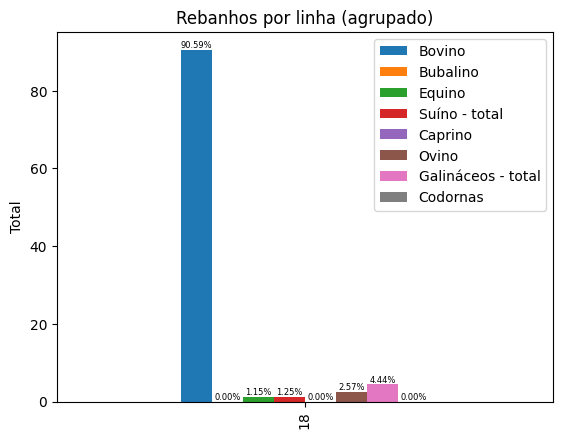

In [15]:
# Aqui conseguimos vizualizar a distribuição de animais de paranapoema
import matplotlib.pyplot as plt

ax = df_cidade[cols].plot(kind='bar')
plt.ylabel('Total')
plt.title('Rebanhos por linha (agrupado)')

# Adicionamos valores nas barras
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='edge', fontsize=6)

plt.show()